In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

# 1-1 模拟随机试验

正面出现的概率为: 0.60
反面出现的概率为: 0.40


/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36136 (\N{CJK UNIFIED IDEOGRAPH-8D28}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20989 (\N{CJK UNIFIE

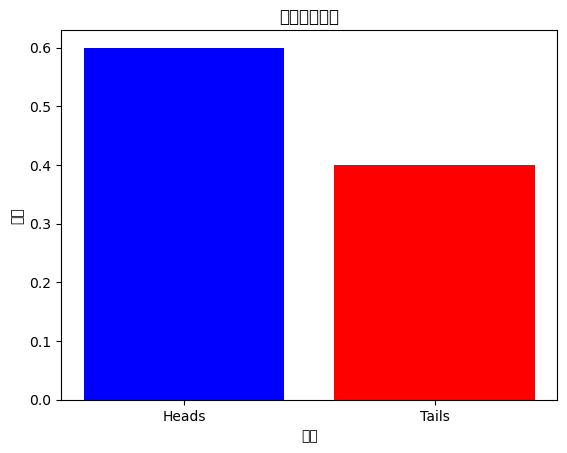

In [6]:
# 模拟抛硬币，‘H’代表正面，‘T’代表反面
def toss_coin():
  return 'H' if random.random() < 0.5 else 'T'

N = 10

# 模拟1000次抛硬币
results = [toss_coin() for _ in range(N)]

# 统计正面和反面的次数
heads_count = results.count('H')
tails_count = results.count('T')

# 计算正面出现的概率
head_probability = heads_count / N
tail_probability = tails_count / N

print(f"正面出现的概率为: {head_probability:.2f}")
print(f"反面出现的概率为: {tail_probability:.2f}")

# 绘制概率质量函数
labels = ['Heads', 'Tails']
values = [head_probability, tail_probability]

plt.bar(labels, values, color=['blue', 'red'])
plt.xlabel('结果')
plt.ylabel('概率')
plt.title('概率质量函数')
plt.show()


# 期望、方差、协方差

In [12]:
# 生成两组随机数
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

# 计算期望
mean1 = np.mean(data1)
mean2 = np.mean(data2)

# 计算方差
variance1 = np.var(data1)
variance2 = np.var(data2)

# 计算协方差
covariance = np.cov(data1, data2)[0][1]

print(f"data1的期望为: {mean1:.2f}")
print(f"data2的期望为: {mean2:.2f}")
print(f"data1的方差为: {variance1:.2f}")
print(f"data2的方差为: {variance2:.2f}")
print(f"data1和data2的协方差为: {covariance:.2f}")

data1的期望为: -0.04
data2的期望为: -0.00
data1的方差为: 0.96
data2的方差为: 1.04
data1和data2的协方差为: 0.01


# 模拟常见的概率分布

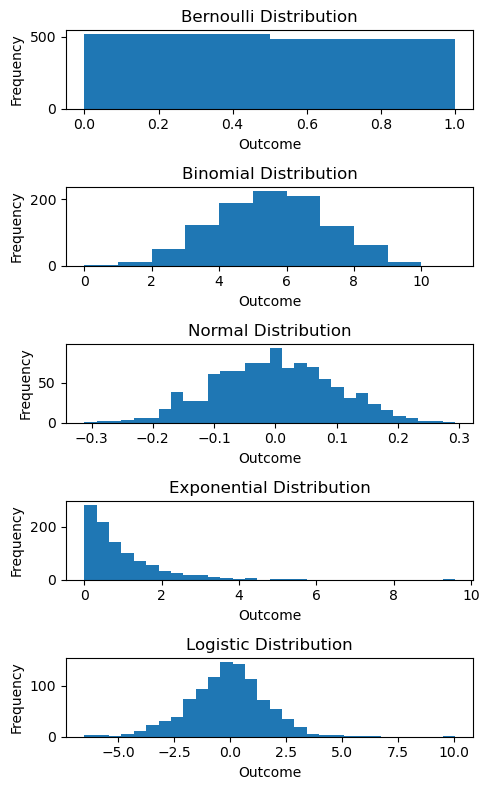

In [13]:
# 设定随机数种子，以使复现试验结果
np.random.seed(0)

# 伯努利分布（假设p为成功概率）
p = 0.5 
bernoulli_dist = np.random.binomial(1, p, size=1000)

# 二项分布（假设n为试验次数，p为成功概率）
n = 10
p = 0.5
binomial_dist = np.random.binomial(n, p, size=1000)

# 正态分布 （mu 为均值，sigma为标准差）
mu, sigma = 0, 0.1
normal_dist = np.random.normal(mu, sigma, size=1000)

# 指数分布（参数lambda 为率参数，其倒数为平均间隔时间）
lambd = 1
exponential_dist = np.random.exponential(1/lambd, size=1000)

# Logistic分布（参数mu为位置参数，s为尺度参数）
mu, s = 0, 1
logistic_dist = np.random.logistic(mu, s, size=1000)

# 绘制柱状图
fig, ax = plt.subplots(5, 1, figsize=(5, 8))

# 伯努利分布
ax[0].hist(bernoulli_dist, bins=2)
ax[0].set_title('Bernoulli Distribution')
ax[0].set_xlabel('Outcome')
ax[0].set_ylabel('Frequency')

# 二项分布
ax[1].hist(binomial_dist, bins=range(n+2))
ax[1].set_title('Binomial Distribution')
ax[1].set_xlabel('Outcome')
ax[1].set_ylabel('Frequency')

# 正态分布
ax[2].hist(normal_dist, bins=30)
ax[2].set_title('Normal Distribution')
ax[2].set_xlabel('Outcome')
ax[2].set_ylabel('Frequency')

# 指数分布
ax[3].hist(exponential_dist, bins=30)
ax[3].set_title('Exponential Distribution')
ax[3].set_xlabel('Outcome')
ax[3].set_ylabel('Frequency')

# Logistic分布
ax[4].hist(logistic_dist, bins=30)
ax[4].set_title('Logistic Distribution')
ax[4].set_xlabel('Outcome')
ax[4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 大数定律&投硬币大数定律

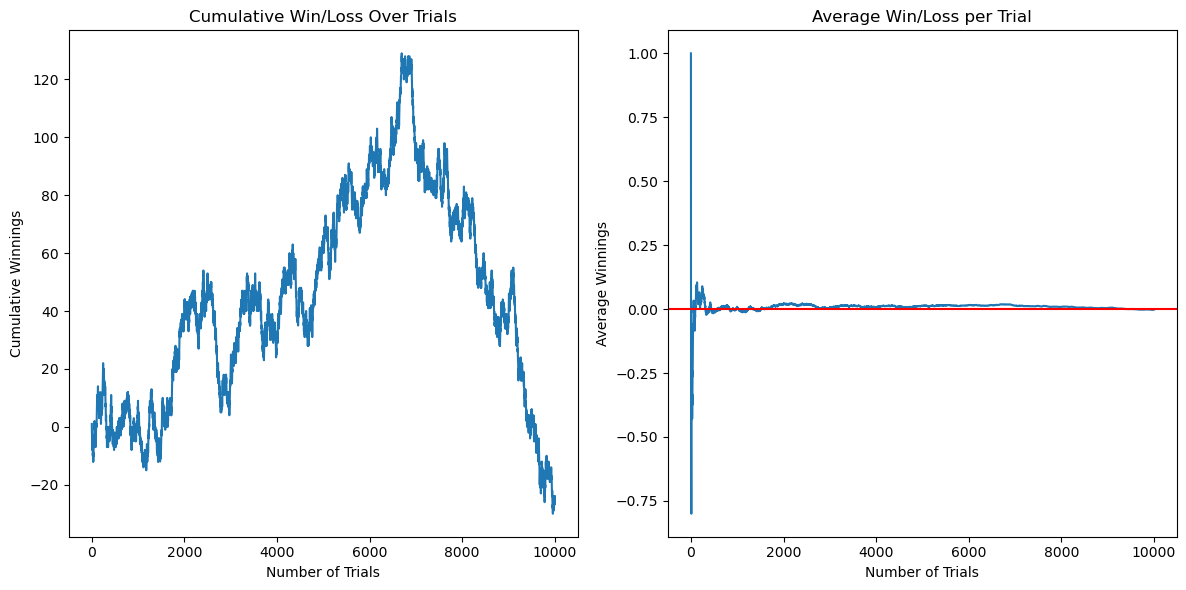

In [28]:
def gamble_game(trials):
  # 抛硬币游戏，正面是1，反面是-1
  results = np.random.choice([1, -1], size=trials)
  return results

def simulate_gambling(trials):
  results = gamble_game(trials)
  
  # 计算累计盈亏
  cumulative_sum = np.cumsum(results)
  
  # 计算平均盈亏
  average_win_loss = cumulative_sum / np.arange(1, trials + 1)
  
  return cumulative_sum, average_win_loss

def plot_results(trials):
  cumulative_sum, average_win_loss = simulate_gambling(trials)
  
  # 绘制累计盈亏图
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(cumulative_sum, label='Cumulative Sum')
  plt.title('Cumulative Win/Loss Over Trials')
  plt.xlabel('Number of Trials')
  plt.ylabel('Cumulative Winnings')
  
  # 绘制平均盈亏图
  plt.subplot(1, 2, 2)
  plt.plot(average_win_loss, label='Average Win/Loss')
  plt.axhline(y=0, color='r', linestyle='-')
  plt.title('Average Win/Loss per Trial')
  plt.xlabel('Number of Trials')
  plt.ylabel('Average Winnings')
  
  plt.tight_layout()
  plt.show()
  
plot_results(10000)

# 中心极限定理

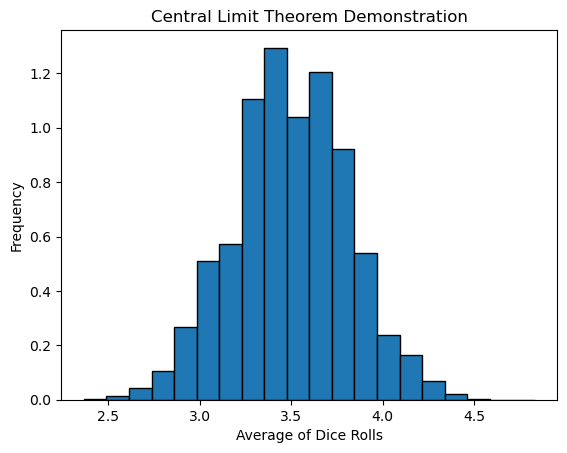

In [30]:
def roll_dice():
  # 模拟投掷一个六面骰子
  return np.random.randint(1, 7)

def experiment(num_rolls):
  # 进行一次试验，试验包括 num_rolls 次投掷骰子
  total = 0
  for _ in range(num_rolls):
    total += roll_dice()
  return total / num_rolls

def run_experiment(num_experiments, num_rolls):
  # 进行多次试验，并计算每次试验的平均值
  averages = []
  for _ in range(num_experiments):
    averages.append(experiment(num_rolls))
  return averages

def plot_histogram(averages):
  plt.hist(averages, bins=20, edgecolor='black', density=True)
  plt.xlabel('Average of Dice Rolls')
  plt.ylabel('Frequency')
  plt.title('Central Limit Theorem Demonstration')
  plt.show()

if __name__ == "__main__":
  num_experiments = 10000
  num_rolls = 30
  
  averages = run_experiment(num_experiments, num_rolls)
  plot_histogram(averages)
  